In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from statsmodels.stats.diagnostic import acorr_breusch_godfrey as bg
from statsmodels.stats.diagnostic import het_white as wh
from statsmodels.tsa import filters as hp

In [2]:
Datos= pd.read_csv("data.csv", parse_dates = ["Periodos"],index_col = "Periodos")

In [3]:
Datos["PIB"]=np.log(Datos['PIB'])
Datos["M2"]=np.log(Datos['M2'])
Datos["dPIB"] = Datos['PIB'].shift()
Datos=Datos.dropna()
Datos

,INF,M2,LP,PIB,INPC,i,dPIB
Periodos,,,,,,,
2001-02-01,0.323333,21.338578,21.015245,16.214809,49.211214,14.030000,16.221086
2001-03-01,0.420000,21.383723,20.963723,16.222004,49.546090,10.446667,16.214809
2001-04-01,0.323333,21.430301,21.106967,16.224837,50.325394,9.060000,16.222004
2002-01-01,0.456667,21.429823,20.973157,16.220931,50.965390,8.476667,16.224837
2002-02-01,0.413333,21.440093,21.026759,16.230556,51.560417,7.666667,16.220931
...,...,...,...,...,...,...,...
2019-03-01,0.206667,22.922548,22.715882,16.593120,103.766333,8.350000,16.597391
2019-04-01,0.636667,22.936592,22.299925,16.586162,105.261000,7.856667,16.593120
2020-01-01,0.283333,22.970720,22.687387,16.570365,106.724667,7.340000,16.586162


In [4]:
Datos["r"] = Datos['i']-Datos['INF']
Datos

,INF,M2,LP,PIB,INPC,i,dPIB,r
Periodos,,,,,,,,
2001-02-01,0.323333,21.338578,21.015245,16.214809,49.211214,14.030000,16.221086,13.706667
2001-03-01,0.420000,21.383723,20.963723,16.222004,49.546090,10.446667,16.214809,10.026667
2001-04-01,0.323333,21.430301,21.106967,16.224837,50.325394,9.060000,16.222004,8.736667
2002-01-01,0.456667,21.429823,20.973157,16.220931,50.965390,8.476667,16.224837,8.020000
2002-02-01,0.413333,21.440093,21.026759,16.230556,51.560417,7.666667,16.220931,7.253333
...,...,...,...,...,...,...,...,...
2019-03-01,0.206667,22.922548,22.715882,16.593120,103.766333,8.350000,16.597391,8.143333
2019-04-01,0.636667,22.936592,22.299925,16.586162,105.261000,7.856667,16.593120,7.220000
2020-01-01,0.283333,22.970720,22.687387,16.570365,106.724667,7.340000,16.586162,7.056667


In [5]:
Exog1 = Datos[['PIB','i']]
Exog1 = sm.add_constant(Exog1)
Mod1 = sm.OLS(Datos.LP, Exog1)
print(Mod1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     LP   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     66.74
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           2.23e-17
Time:                        17:43:02   Log-Likelihood:                -29.096
No. Observations:                  78   AIC:                             64.19
Df Residuals:                      75   BIC:                             71.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.0595      6.203     -6.135      0.0

#### Los resultados de la estimación son positivos respecto a la teoría, esto debido a que los signos esperados se cumplen, al igual que los estadisticos son significativos.
#### Sin embargo, se realizaran pruebas de autocorrelación, heterocedasticidad y multicolinealidad.
#### Comenzamos obteniendo los residuos del modelo.

In [6]:
res1= Mod1.fit().resid

In [7]:
bg(Mod1.fit(), nlags=2, store = False)

(13.653339117326997,
 0.0010844638531696143,
 7.744720098080918,
 0.0008907309738474592)

#### La prueba Breusch-Godfrey comprueba la presencia de autocorrelación en el modelo, aunque debido a que estaremos respetando las bases teóricas por el momento, no se buscará solucionar dichos problemas con métodos como usar primeras diferencias.

In [8]:
wh(res1, Exog1)

(2.5713237503182835,
 0.7657173408984732,
 0.49088839743146867,
 0.7820153123500188)

#### La prueba White comprueba la presencia de homocedasticidad en el modelo.

In [9]:
Exog2 = Datos[['r']]
Exog2 = sm.add_constant(Exog2)
Mod2 = sm.OLS(Datos.PIB, Exog2)
print(Mod2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    PIB   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     11.63
Date:                Fri, 05 Mar 2021   Prob (F-statistic):            0.00104
Time:                        17:43:08   Log-Likelihood:                 62.681
No. Observations:                  78   AIC:                            -121.4
Df Residuals:                      76   BIC:                            -116.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5522      0.038    429.957      0.0

In [10]:
res2= Mod2.fit().resid

In [11]:
bg(Mod2.fit(), nlags=2, store = False)

(68.35722435200216,
 1.4335648136818662e-15,
 262.2914182960617,
 2.558444561390689e-34)

#### La prueba Breusch-Godfrey comprueba la presencia de autocorrelación en el modelo, aunque debido a que estaremos respetando las bases teóricas como se había comentado antes, no se buscará solucionar dichos problemas con métodos como usar primeras diferencias.

In [12]:
wh(res2, Exog2)

(15.351491717997956,
 0.0004639443914194164,
 9.18906060513986,
 0.0002695286543819831)

#### La prueba White comprueba la presencia de heterocedasticidad en el modelo.


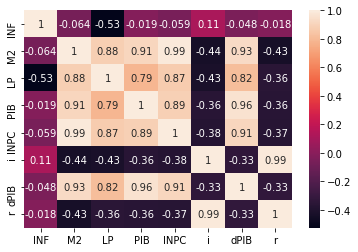

In [13]:
MatrizCorr1 = Datos.corr()
sn.heatmap(MatrizCorr1, annot=True)
plt.show()

#### La correlación de "LP" con el "PIB" e "i" siendo menor a 0.8 por lo que no hay Multicolinealidad.
#### La correlación de "PIB" con el "r" siendo menor a 0.8 por lo que no hay Multicolinealidad.

## A continuación se ocupará el filtro Hodrick-Prescott para obtener las tendencias y ciclos de las variables a tratar.

In [14]:
PIB_ciclo, PIB_tenden = hp.hp_filter.hpfilter(Datos.PIB, lamb=1600)
PIB_decomp = Datos[['PIB']].copy()
PIB_decomp["ciclo"] = PIB_ciclo
PIB_decomp["tenden"] = PIB_tenden

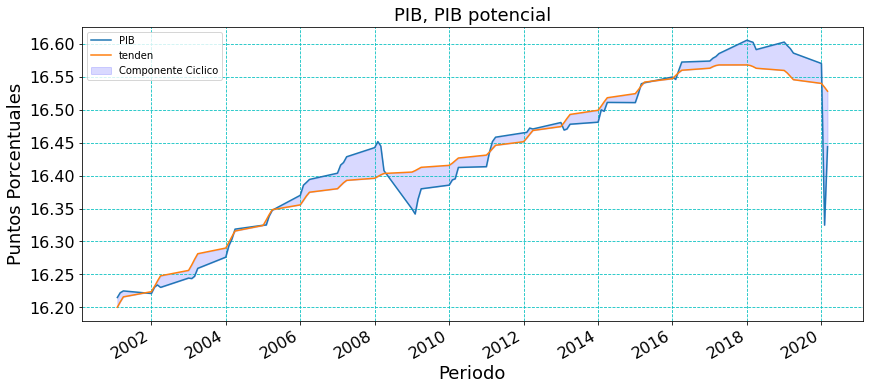

In [15]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
PIB_decomp[["PIB", "tenden"]]["2001-01-01":].plot(ax=ax, fontsize=16);
legend = ax.get_legend()
legend.prop.set_size(20);

plt.grid(color='c', linestyle='--')

plt.fill_between(Datos.index, y1=Datos["PIB"], y2=PIB_tenden, alpha=0.15, label="Componente Ciclico", color='b')
plt.title('PIB, PIB potencial', fontsize=18)
plt.xlabel('Periodo', fontsize=18)
plt.ylabel('Puntos Porcentuales', fontsize=18)
plt.legend(loc='upper left')
plt.savefig("Gráfica_1.pdf", bbox_inches='tight')